In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)
from sklearn import metrics

In [2]:
df=pd.read_csv('data_icaller.csv')
df['ratio_in_contact']=df.in_contact/df.sum_call

In [3]:
df.sample(10)

,phone,type,in_contact,duration,call_to,call_in,call_to_miss,call_in_miss,duration_call_to,duration_call_in,duration_call_to_miss,duration_call_in_miss,sum_call,Spam,Unnamed: 14,ratio_in_contact
930,84945217869,4,1,0,0,0,0,1,0,0,0,0,1,0,NaN,1.0
624,84909043431,2,0,67,2,0,0,0,67,0,0,0,2,0,NaN,0.0
650,84899176709,6,0,73,3,0,1,0,73,0,0,0,4,0,NaN,0.0
313,84898344074,3,0,0,0,0,1,0,0,0,0,0,1,1,NaN,0.0
415,84936315036,9,0,0,0,0,3,0,0,0,0,0,3,1,NaN,0.0
790,84914084244,8,5,118,2,3,0,0,50,68,0,0,5,0,NaN,1.0
652,84395156006,11,4,74,1,1,0,2,49,25,0,0,4,0,NaN,1.0
831,8.42E+11,8,2,0,0,0,0,2,0,0,0,0,2,0,NaN,1.0
886,84966676685,25,10,241,3,3,0,4,161,80,0,0,10,0,NaN,1.0
163,1310000,36,0,278,12,0,8,0,278,0,0,0,20,1,NaN,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   phone                  1200 non-null   object 
 1   type                   1200 non-null   int64  
 2   in_contact             1200 non-null   int64  
 3   duration               1200 non-null   int64  
 4   call_to                1200 non-null   int64  
 5   call_in                1200 non-null   int64  
 6   call_to_miss           1200 non-null   int64  
 7   call_in_miss           1200 non-null   int64  
 8   duration_call_to       1200 non-null   int64  
 9   duration_call_in       1200 non-null   int64  
 10  duration_call_to_miss  1200 non-null   int64  
 11  duration_call_in_miss  1200 non-null   int64  
 12  sum_call               1200 non-null   int64  
 13  Spam                   1200 non-null   int64  
 14  Unnamed: 14            0 non-null      float64
 15  rati

In [5]:
df.columns

Index(['phone', 'type', 'in_contact', 'duration', 'call_to', 'call_in',
       'call_to_miss', 'call_in_miss', 'duration_call_to', 'duration_call_in',
       'duration_call_to_miss', 'duration_call_in_miss', 'sum_call', 'Spam',
       'Unnamed: 14', 'ratio_in_contact'],
      dtype='object')

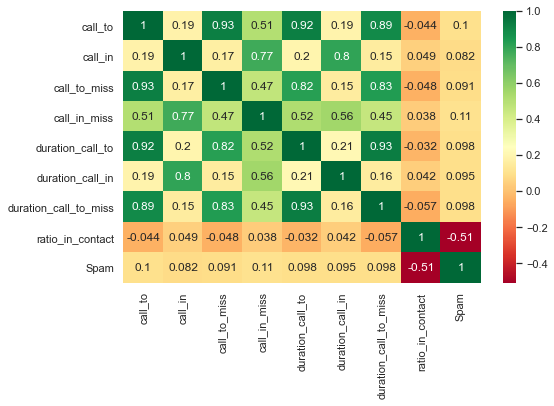

In [6]:
features = [ 'call_to', 'call_in',
       'call_to_miss', 'call_in_miss', 'duration_call_to', 'duration_call_in',
       'duration_call_to_miss','ratio_in_contact','Spam']
feature_names = [ 'call_to', 'call_in',
       'call_to_miss', 'call_in_miss', 'duration_call_to', 'duration_call_in',
       'duration_call_to_miss','ratio_in_contact']
X = df[features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [7]:
X=df[feature_names]
y=df['Spam']

In [8]:
#  sns.pairplot(df[features])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import eli5
from eli5.sklearn import PermutationImportance

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
class LR:

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def loss_function(self, y_pred, y_test):
        return - np.sum(y_test * np.log(y_pred)  + (1 - y_test)*np.log(1 - y_pred))
        
    def fit(self, X, y, epochs = 30, tol=1e-4, learning_rate = 0.05):
        X = np.array(X)
        y = np.array(y)
        num_attr = X.shape[1]
        m = X.shape[0]
        self.weights = np.random.randn(num_attr + 1, 1)
        ones = np.ones([m, 1])
        X = np.concatenate((ones, X), axis = 1)
        y.shape = (y.size, 1)
        a = []
        for i in range(epochs):
            z = np.dot(X, self.weights)
            z = self.sigmoid(z)            
            grad = np.zeros([num_attr + 1, 1])
            for j in range(num_attr + 1):    
                b = X.T[j]
                b.shape = (b.size, 1)
                grad[j] = np.sum((z - y) * b) 
            self.weights = self.weights - learning_rate*grad
           
        print(self.weights)
            
    def predict(self, data, threshold = 0.5):
         m = data.shape[0]
         ones = np.ones([m, 1])
         data = np.concatenate((ones, data), axis = 1)
         z = np.dot(data, self.weights)
         z = self.sigmoid(z)
         predict = np.uint8(np.zeros(z.shape))
         for i in range(z.shape[0]):
             if(z[i] >= threshold):  
                 predict[i] = 1
         return predict

In [12]:
train_X = X_train 
train_Y = y_train
test_X = X_test
test_Y = y_test

a = LR()
a.fit(train_X, train_Y, epochs = 300, learning_rate = 0.00005)
    
    
predictions_test = a.predict(test_X)
accuracy_test = metrics.accuracy_score(predictions_test, test_Y)
f1_score_test = metrics.f1_score(predictions_test, test_Y)
precision_test = metrics.precision_score(predictions_test, test_Y)
recall_test = metrics.recall_score(predictions_test, test_Y)

print("Accuracy: ", accuracy_test)
print("F1 score: ", f1_score_test)
print("Precision: ", precision_test)
print("Recall: ", recall_test)

[[-5.17464732]
 [ 0.45275931]
 [ 3.5410348 ]
 [ 5.70047666]
 [-0.20550853]
 [ 4.31527138]
 [ 4.4793651 ]
 [ 4.34789699]
 [-3.21616437]]
Accuracy:  0.5625
F1 score:  0.6991404011461319
Precision:  0.9682539682539683
Recall:  0.547085201793722


<ipython-input-11-515694781143>:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


accuracy_LR = round(metrics.accuracy_score(y_pred, y_test),3)
f1_score_LR = round(metrics.f1_score(y_pred, y_test),3)
precision_LR = round(metrics.precision_score(y_pred, y_test),3)
recall_LR = round(metrics.recall_score(y_pred, y_test),3)

print("Accuracy LR: ", accuracy_LR)
print("F1 score LR: ", f1_score_LR)
print("Precision LR: ", precision_LR)
print("Recall LR: ", recall_LR)

perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy LR:  0.762
F1 score LR:  0.776
Precision LR:  0.786
Recall LR:  0.767


Weight,Feature
0.2642 ± 0.0688,call_to_miss
0.0342 ± 0.0220,ratio_in_contact
0.0158 ± 0.0162,call_in_miss
0.0100 ± 0.0180,call_to
0.0050 ± 0.0193,duration_call_to_miss
0.0050 ± 0.0111,duration_call_in
0.0050 ± 0.0133,duration_call_to
0.0050 ± 0.0122,call_in


In [14]:
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)


accuracy_SVC = round(metrics.accuracy_score(y_pred, y_test),3)
f1_score_SVC = round(metrics.f1_score(y_pred, y_test),3)
precision_SVC = round(metrics.precision_score(y_pred, y_test),3)
recall_SVC = round(metrics.recall_score(y_pred, y_test),3)

print("Accuracy SVC: ", accuracy_SVC)
print("F1 score SVC: ", f1_score_SVC)
print("Precision SVC: ", precision_SVC)
print("Recall SVC: ", recall_SVC)

perm = PermutationImportance(svc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


Accuracy SVC:  0.775
F1 score SVC:  0.763
Precision SVC:  0.69
Recall SVC:  0.853


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Weight,Feature
0.1575 ± 0.0416,call_to_miss
0.0542 ± 0.0337,call_to
0.0525 ± 0.0100,call_in
0.0458 ± 0.0284,duration_call_in
0.0325 ± 0.0318,ratio_in_contact
0.0308 ± 0.0371,duration_call_to
0.0058 ± 0.0100,call_in_miss
0.0033 ± 0.0133,duration_call_to_miss


In [15]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)


accuracy_RF = round(metrics.accuracy_score(y_pred, y_test),3)
f1_score_RF = round(metrics.f1_score(y_pred, y_test),3)
precision_RF = round(metrics.precision_score(y_pred, y_test),3)
recall_RF = round(metrics.recall_score(y_pred, y_test),3)

print("Accuracy RF : ", accuracy_RF)
print("F1 score RF: ", f1_score_RF)
print("Precision RF: ", precision_RF)
print("Recall RF: ", recall_RF)

perm = PermutationImportance(random_forest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Accuracy RF :  0.825
F1 score RF:  0.832
Precision RF:  0.825
Recall RF:  0.839


Weight,Feature
0.0925 ± 0.0170,ratio_in_contact
0.0525 ± 0.0424,call_to_miss
0.0408 ± 0.0097,duration_call_in
0.0283 ± 0.0255,call_in_miss
0.0175 ± 0.0305,call_to
0.0150 ± 0.0221,call_in
0.0142 ± 0.0389,duration_call_to
0.0075 ± 0.0111,duration_call_to_miss


In [16]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


accuracy_KNN = round(metrics.accuracy_score(y_pred, y_test),3)
f1_score_KNN = round(metrics.f1_score(y_pred, y_test),3)
precision_KNN = round(metrics.precision_score(y_pred, y_test),3)
recall_KNN = round(metrics.recall_score(y_pred, y_test),3)

print("Accuracy KNN: ", accuracy_KNN)
print("F1 score KNN: ", f1_score_KNN)
print("Precision KNN: ", precision_KNN)
print("Recall KNN: ", recall_KNN)

perm = PermutationImportance(knn, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Accuracy KNN:  0.754
F1 score KNN:  0.765
Precision KNN:  0.762
Recall KNN:  0.768


Weight,Feature
0.1008 ± 0.0374,duration_call_in
0.0633 ± 0.0367,duration_call_to
0.0342 ± 0.0370,call_to_miss
0.0292 ± 0.0118,call_in_miss
0.0258 ± 0.0186,duration_call_to_miss
0.0250 ± 0.0242,call_to
0.0092 ± 0.0178,ratio_in_contact
0.0008 ± 0.0082,call_in


In [21]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred = knn.predict(X_test)


accuracy_NB = round(metrics.accuracy_score(y_pred, y_test),3)
f1_score_NB = round(metrics.f1_score(y_pred, y_test),3)
precision_NB = round(metrics.precision_score(y_pred, y_test),3)
recall_NB = round(metrics.recall_score(y_pred, y_test),3)

print("Accuracy NB: ", accuracy_NB)
print("F1 score NB: ", f1_score_NB)
print("Precision NB: ", precision_NB)
print("Recall NB: ", recall_NB)

perm = PermutationImportance(knn, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Accuracy NB:  0.754
F1 score NB:  0.765
Precision NB:  0.762
Recall NB:  0.768


Weight,Feature
0.1008 ± 0.0374,duration_call_in
0.0633 ± 0.0367,duration_call_to
0.0342 ± 0.0370,call_to_miss
0.0292 ± 0.0118,call_in_miss
0.0258 ± 0.0186,duration_call_to_miss
0.0250 ± 0.0242,call_to
0.0092 ± 0.0178,ratio_in_contact
0.0008 ± 0.0082,call_in


In [18]:
models = pd.DataFrame({
    'Model': ['LogisticRegression', 'KNN', 'LinearSVC', 
              'Random Forest', 'Naive Bayes'],
    'Score': [accuracy_LR, accuracy_KNN, accuracy_SVC, 
              accuracy_RF,accuracy_NB]
              })
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.825
2,LinearSVC,0.775
0,LogisticRegression,0.762
1,KNN,0.754
4,Naive Bayes,0.750


In [22]:
# from matplotlib import pyplot as plt
# from pdpbox import pdp, get_dataset, info_plots

# # Create the data that we will plot
# pdp_Spam = pdp.pdp_isolate(model=random_forest, dataset=X_test, model_features=features, feature='Spam')

# # plot it
# pdp.pdp_plot(pdp_goals, 'Spam')
# plt.show()

In [ ]:
s